In [3]:
import glob
import pandas as pd
import os

# Define the folder path
folder = "Desktop/Data_chicago/"

# List all CSV files in the folder
crime_files = sorted(glob.glob(os.path.join(folder, "*.csv")))

# Check if any files were found
if not crime_files:
    raise ValueError(f"No CSV files found in the directory: {folder}")

# Concatenate all CSV files into a single DataFrame
df = pd.concat([pd.read_csv(f) for f in crime_files])

# Display the first few rows of the concatenated DataFrame
df.head()



,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [21]:
import pandas as pd

# Reset the index of the DataFrame
df.reset_index(inplace=True)

# Now try melting the DataFrame, but avoid duplicating 'Date' column
melted = pd.melt(df, id_vars=['ID', 'Date', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude', 'Longitude'], value_name="Confirmed", var_name="Variable")

# Convert the 'Date' column to datetime format
melted['Date'] = pd.to_datetime(melted['Date'])

# Display the information about the melted DataFrame
melted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15426218 entries, 0 to 15426217
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
 12  Variable              object        
 13  Confirmed             int64         
dtypes: bool(2), datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.4+ GB


In [23]:
melted.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Variable,Confirmed
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,level_0,0
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,level_0,1
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,level_0,2
3,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,level_0,3
4,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,level_0,4


 ​What months have the most crime? What months have the least?

In [29]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from 'Date' column
df['Month'] = df['Date'].dt.month

# Count the number of incidents per month
monthly_crime_counts = df.groupby('Month').size()

# Find the month with the most and least crime incidents
most_crime_month = monthly_crime_counts.idxmax()
least_crime_month = monthly_crime_counts.idxmin()

# Print the results
print("Month with the most crime incidents:", most_crime_month)
print("Month with the least crime incidents:", least_crime_month)


Month with the most crime incidents: 7
Month with the least crime incidents: 2


 Comparing AM vs. PM Rush Hour:
Are crimes more common during AM rush hour or PM rush hour?wean consider any crime that occurred between 7 AM - 10 AM as AM rush houwe can consider any crime that occurred between 4 - 7 PM as PM rush houon: ​What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hoion: ​Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [31]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define AM and PM rush hour time ranges
am_rush_hour_start = pd.to_datetime('7:00:00').time()
am_rush_hour_end = pd.to_datetime('10:00:00').time()
pm_rush_hour_start = pd.to_datetime('16:00:00').time()
pm_rush_hour_end = pd.to_datetime('19:00:00').time()

# Filter the dataset to include only crimes during AM and PM rush hours
am_rush_hour_data = df[df['Date'].dt.time.between(am_rush_hour_start, am_rush_hour_end)]
pm_rush_hour_data = df[df['Date'].dt.time.between(pm_rush_hour_start, pm_rush_hour_end)]

# Count the occurrences of each crime during AM and PM rush hours
am_rush_hour_crime_counts = am_rush_hour_data['Primary Type'].value_counts().head(5)
pm_rush_hour_crime_counts = pm_rush_hour_data['Primary Type'].value_counts().head(5)

# Print the top 5 most common crimes during AM and PM rush hours
print("Top 5 most common crimes during AM rush hour:")
print(am_rush_hour_crime_counts)
print("\nTop 5 most common crimes during PM rush hour:")
print(pm_rush_hour_crime_counts)

# Check if Motor Vehicle Thefts are more common during AM or PM rush hour
am_vehicle_thefts = am_rush_hour_data[am_rush_hour_data['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
pm_vehicle_thefts = pm_rush_hour_data[pm_rush_hour_data['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]

if am_vehicle_thefts > pm_vehicle_thefts:
    print("\nMotor Vehicle Thefts are more common during AM rush hour.")
elif am_vehicle_thefts < pm_vehicle_thefts:
    print("\nMotor Vehicle Thefts are more common during PM rush hour.")
else:
    print("\nMotor Vehicle Thefts occur with equal frequency during AM and PM rush hours.")


Top 5 most common crimes during AM rush hour:
THEFT              220879
BATTERY            118612
CRIMINAL DAMAGE     93153
BURGLARY            84944
OTHER OFFENSE       73991
Name: Primary Type, dtype: int64

Top 5 most common crimes during PM rush hour:
THEFT              333344
BATTERY            228265
CRIMINAL DAMAGE    155030
NARCOTICS          107795
ASSAULT             95933
Name: Primary Type, dtype: int64

Motor Vehicle Thefts are more common during PM rush hour.


Crimes Across the Years:

Is the total number of crimes increasing or decreasing across the years?
Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

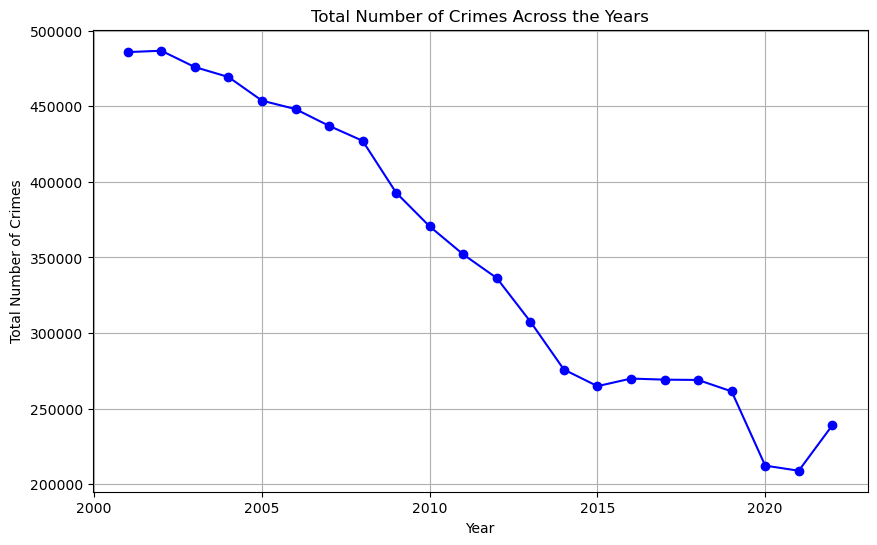

The total number of crimes is decreasing across the years.

Crimes with opposite trends compared to the total number of crimes:
Year                                  2001     2002     2003     2004  \
Primary Type                                                            
ARSON                               1011.0   1032.0    955.0    778.0   
ASSAULT                            31384.0  31523.0  29477.0  28850.0   
BATTERY                            93461.0  94153.0  88380.0  87136.0   
BURGLARY                           26014.0  25623.0  25157.0  24564.0   
CONCEALED CARRY LICENSE VIOLATION      1.0      0.0      0.0      0.0   
CRIM SEXUAL ASSAULT                 1779.0   1807.0   1571.0   1538.0   
CRIMINAL DAMAGE                    55859.0  55941.0  55011.0  53164.0   
CRIMINAL SEXUAL ASSAULT               29.0     27.0     41.0     42.0   
CRIMINAL TRESPASS                  13241.0  13880.0  14807.0  15913.0   
DECEPTIVE PRACTICE                 14949.0  13732.0  13459.0  13255.0

In [33]:
import matplotlib.pyplot as plt 
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and count the total number of crimes for each year
total_crimes_per_year = df.groupby('Year').size()

# Plot the total number of crimes over the years
plt.figure(figsize=(10, 6))
total_crimes_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Total Number of Crimes Across the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.grid(True)
plt.show()

# Determine if the total number of crimes is increasing or decreasing across the years
if total_crimes_per_year.iloc[-1] > total_crimes_per_year.iloc[0]:
    trend = "increasing"
elif total_crimes_per_year.iloc[-1] < total_crimes_per_year.iloc[0]:
    trend = "decreasing"
else:
    trend = "stagnant"

print("The total number of crimes is", trend, "across the years.")

# Identify individual crimes and their trends across the years
individual_crime_trends = df.groupby(['Primary Type', 'Year']).size().unstack().fillna(0)

# Calculate the difference between the first and last years for each crime
individual_crime_trends['Difference'] = individual_crime_trends.max(axis=1) - individual_crime_trends.min(axis=1)

# Identify crimes with opposite trends compared to the total number of crimes
opposite_trend_crimes = individual_crime_trends[individual_crime_trends['Difference'] * (total_crimes_per_year.iloc[-1] - total_crimes_per_year.iloc[0]) < 0]

print("\nCrimes with opposite trends compared to the total number of crimes:")
print(opposite_trend_crimes)

 Comparing Police Districts
Which district had the most crimes in 2022?
Which had the least?

In [34]:
# Filter the dataset to include only data from the year 2022
df_2022 = df[df['Year'] == 2022]

# Group the data by police district and count the number of crimes in each district
crime_counts_by_district = df_2022['District'].value_counts()

# Determine the police district with the most crimes
district_with_most_crimes = crime_counts_by_district.idxmax()
most_crimes_count = crime_counts_by_district.max()

# Determine the police district with the least crimes
district_with_least_crimes = crime_counts_by_district.idxmin()
least_crimes_count = crime_counts_by_district.min()

print("Police district with the most crimes in 2022:", district_with_most_crimes)
print("Number of crimes:", most_crimes_count)

print("\nPolice district with the least crimes in 2022:", district_with_least_crimes)
print("Number of crimes:", least_crimes_count)

Police district with the most crimes in 2022: 8.0
Number of crimes: 14805

Police district with the least crimes in 2022: 31.0
Number of crimes: 15
